# Exploratory Data Analysis on Lagos Air Quality (2020 - 2025)

**Overview**

The study examined the air quality index for the Lagos state. The data was collected from the OpenWeather API. To compute the AQI air pollutants including CO, NO, NO2, 03, NO2 PM2_5, PM10, and NH3 were measured. Measurements of any one particulate matter and any three gaseous pollutants are used to construct the AQI (Maximum value of any three Pollutants). AQI is influenced by local weather conditions in addition to air pollutants in a given area. 

In [2]:
import os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sys.path.insert(0, str(Path().resolve().parent / "src"))

from paths import  TRANSFORMED_DATA_DIR

warnings.filterwarnings("ignore")

## Data Understanding and Inspection

# Data Dictionary

This document describes the features in the air quality dataset.

| Feature   | Data Type | Description |
|-----------|----------|-------------|
| `row_id`  | Integer  | Unique identifier for each record. |
| `aqi`     | Integer  | Air Quality Index (AQI) value indicating the pollution level. |
| `co`      | Float    | Carbon Monoxide (CO) concentration in µg/m³. |
| `no`      | Float    | Nitric Oxide (NO) concentration in µg/m³. |
| `no2`     | Float    | Nitrogen Dioxide (NO₂) concentration in µg/m³. |
| `o3`      | Float    | Ozone (O₃) concentration in µg/m³. |
| `NO2`     | Float    | Sulfur Dioxide (NO₂) concentration in µg/m³. |
| `pm2_5`   | Float    | Fine Particulate Matter (PM2.5) concentration in µg/m³. |
| `pm10`    | Float    | Coarse Particulate Matter (PM10) concentration in µg/m³. |
| `nh3`     | Float    | Ammonia (NH₃) concentration in µg/m³. |
| `date`    | Date     | The date of the recorded measurement (YYYY-MM-DD). |
| `time`    | Time     | The time of the recorded measurement (HH:MM:SS). |
| `aqi_bucket` | String  | Categorical label describing the AQI level (e.g., "Good", "Fair", "Moderate", "Poor", "Very Poor"). |

## Notes:
- **AQI Interpretation**: Higher AQI values indicate worse air quality.
- **Pollutant Concentrations**: Measured in **micrograms per cubic meter (µg/m³)**.
- **Temporal Features (`date`, `time`)**: Useful for time-series analysis of air pollution trends.
- **`aqi_range` Categories**:
  - **Good** (AQI 0-50) → Air quality is satisfactory.
  - **Fair** (AQI 51-100) → Acceptable air quality with minor concern.
  - **Moderate** (AQI 101-200) → May affect sensitive groups.
  - **Poor** (AQI 201-300) → Health effects for sensitive groups; general public may experience irritation.
  - **Very Poor** (AQI 301+) → Significant health impact on all individuals.



In [3]:
# Load dataset
df = pd.read_csv(f"{TRANSFORMED_DATA_DIR}/weather_20200101_to_20250201.csv")
df.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,timestamp,date,time,aqi_bucket
0,5,1682.28,0.13,18.85,12.88,8.82,64.62,90.85,17.48,2020-11-25 01:00:00,2020-11-25,01:00:00,Very Poor
1,5,2109.53,0.36,21.94,9.30,10.37,93.95,127.43,21.03,2020-11-25 02:00:00,2020-11-25,02:00:00,Very Poor
2,5,2750.40,1.41,26.39,4.16,12.52,136.28,181.39,25.59,2020-11-25 03:00:00,2020-11-25,03:00:00,Very Poor
3,5,3337.86,4.81,28.45,0.78,14.07,175.09,233.20,28.63,2020-11-25 04:00:00,2020-11-25,04:00:00,Very Poor
4,5,3738.40,10.95,28.45,0.10,15.26,200.27,262.51,30.91,2020-11-25 05:00:00,2020-11-25,05:00:00,Very Poor


In [4]:
# print the first 5 records
df.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,timestamp,date,time,aqi_bucket
0,5,1682.28,0.13,18.85,12.88,8.82,64.62,90.85,17.48,2020-11-25 01:00:00,2020-11-25,01:00:00,Very Poor
1,5,2109.53,0.36,21.94,9.30,10.37,93.95,127.43,21.03,2020-11-25 02:00:00,2020-11-25,02:00:00,Very Poor
2,5,2750.40,1.41,26.39,4.16,12.52,136.28,181.39,25.59,2020-11-25 03:00:00,2020-11-25,03:00:00,Very Poor
3,5,3337.86,4.81,28.45,0.78,14.07,175.09,233.20,28.63,2020-11-25 04:00:00,2020-11-25,04:00:00,Very Poor
4,5,3738.40,10.95,28.45,0.10,15.26,200.27,262.51,30.91,2020-11-25 05:00:00,2020-11-25,05:00:00,Very Poor


In [5]:
# print the last 5 records
df.tail()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,timestamp,date,time,aqi_bucket
36306,5,2296.45,3.58,31.87,2.37,13.23,77.52,110.61,39.01,2025-01-31 19:00:00,2025-01-31,19:00:00,Very Poor
36307,5,2162.93,2.29,27.76,3.67,12.52,75.46,108.30,35.97,2025-01-31 20:00:00,2025-01-31,20:00:00,Very Poor
36308,4,2002.72,1.13,23.99,6.17,11.56,70.35,102.47,31.66,2025-01-31 21:00:00,2025-01-31,21:00:00,Poor
36309,4,1789.09,0.67,21.08,7.96,10.01,59.70,89.76,25.59,2025-01-31 22:00:00,2025-01-31,22:00:00,Poor
36310,3,1482.01,0.26,18.34,10.55,8.23,44.25,70.18,18.24,2025-01-31 23:00:00,2025-01-31,23:00:00,Moderate


In [6]:
# print the shape of the data
df.shape

(36311, 13)

In [7]:
# check the overall information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36311 entries, 0 to 36310
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aqi         36311 non-null  int64  
 1   co          36311 non-null  float64
 2   no          36311 non-null  float64
 3   no2         36311 non-null  float64
 4   o3          36311 non-null  float64
 5   so2         36311 non-null  float64
 6   pm2_5       36311 non-null  float64
 7   pm10        36311 non-null  float64
 8   nh3         36311 non-null  float64
 9   timestamp   36311 non-null  object 
 10  date        36311 non-null  object 
 11  time        36311 non-null  object 
 12  aqi_bucket  36311 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 3.6+ MB


* There are no missing values in the dataset

## Exploratory Data Analysis

### Descriptive Statistics

Let's start by examining the basic statistics of the dataset.

In [8]:
# descriptive statistics of number columns
df.describe()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,36311.000000,36311.000000,36311.000000,36311.000000,36311.000000,36311.000000,36311.000000,36311.000000,36311.000000
mean,4.398337,3072.045947,12.219604,23.956070,31.385692,14.319235,166.193345,230.730611,33.067149
std,0.907578,2949.451082,26.287357,77.394848,72.235714,9.607405,227.395601,298.275762,25.772978
min,1.000000,547.410000,0.000000,-9999.000000,-9999.000000,2.920000,9.250000,-9999.000000,5.260000
25%,4.000000,1388.550000,0.430000,13.370000,0.530000,8.230000,44.840000,66.855000,17.730000
50%,5.000000,2082.820000,1.230000,19.540000,11.620000,11.560000,86.260000,124.180000,25.840000
75%,5.000000,3471.370000,11.400000,27.760000,39.700000,16.930000,185.335000,264.340000,39.010000
max,5.000000,35888.670000,422.000000,394.820000,486.370000,156.400000,3657.960000,3979.230000,599.860000


## AQI Categorization Analysis

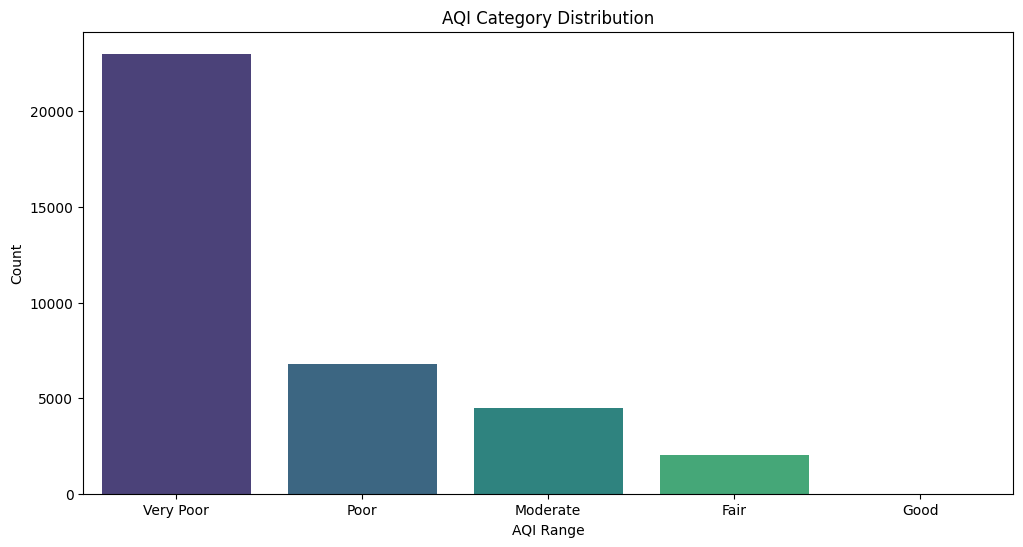

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['aqi_bucket'], palette="viridis")
plt.title("AQI Category Distribution")
plt.xlabel("AQI Range")
plt.ylabel("Count")
plt.show()

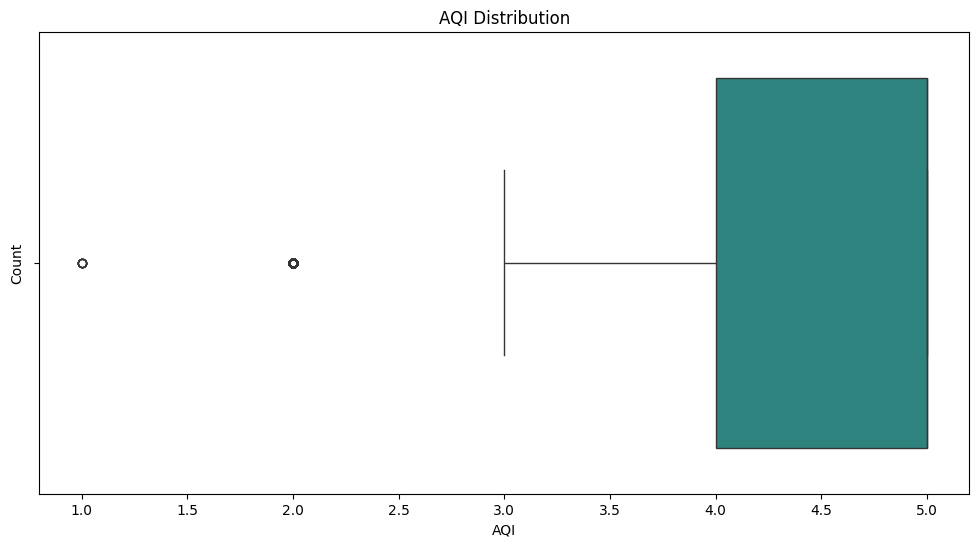

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['aqi'], palette="viridis")
plt.title("AQI Distribution")
plt.xlabel("AQI")
plt.ylabel("Count")
plt.show()

## Pollutant Contribution to Poor AQI

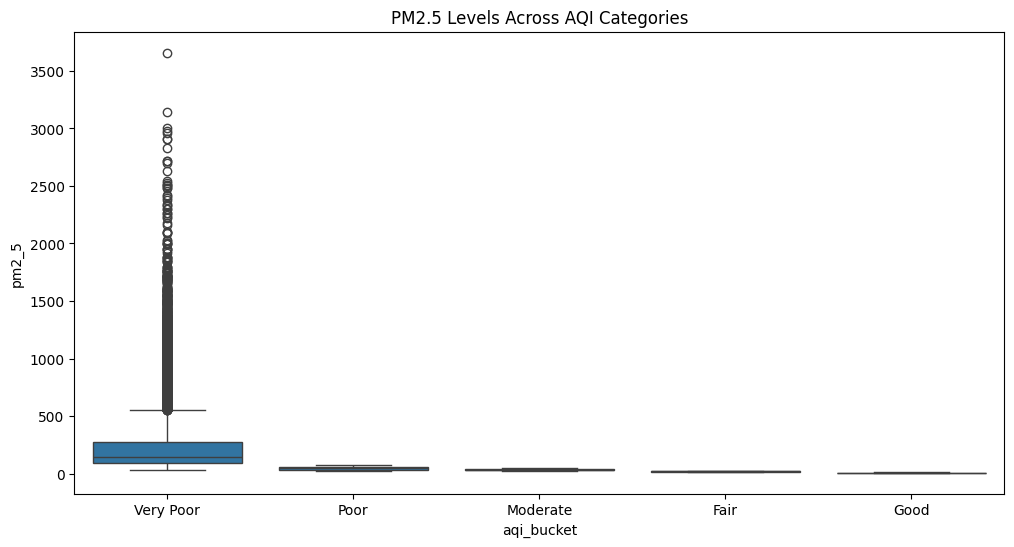

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="aqi_bucket", y="pm2_5", data=df)
plt.title("PM2.5 Levels Across AQI Categories")
plt.show()

**Insights from the Boxplot: PM2.5 Levels Across AQI Categories**

1. PM2.5 is a major contributor to the "Very Poor" AQI category

    - The boxplot shows significantly high PM2.5 levels in the "Very Poor" category compared to others.
    - There are extreme outliers (above 3000 µg/m³), indicating severe pollution episodes.
    - The median PM2.5 level in "Very Poor" AQI is much higher than other categories.

2. Lower PM2.5 levels correspond to better air quality

    - "Good," "Fair," "Moderate," and "Poor" AQI categories have much lower PM2.5 values.
    - The interquartile range (IQR) in these categories is compact, suggesting stable PM2.5 levels when AQI is not "Very Poor."

3. 0utliers suggest episodic pollution spikes

    - Many extreme PM2.5 values in "Very Poor" indicate periodic severe pollution events (e.g., industrial emissions, wildfires, dust storms).

## Pollutant Distribution
Visualizing the distribution of pollutants can provide insights into their behavior and potential outliers.

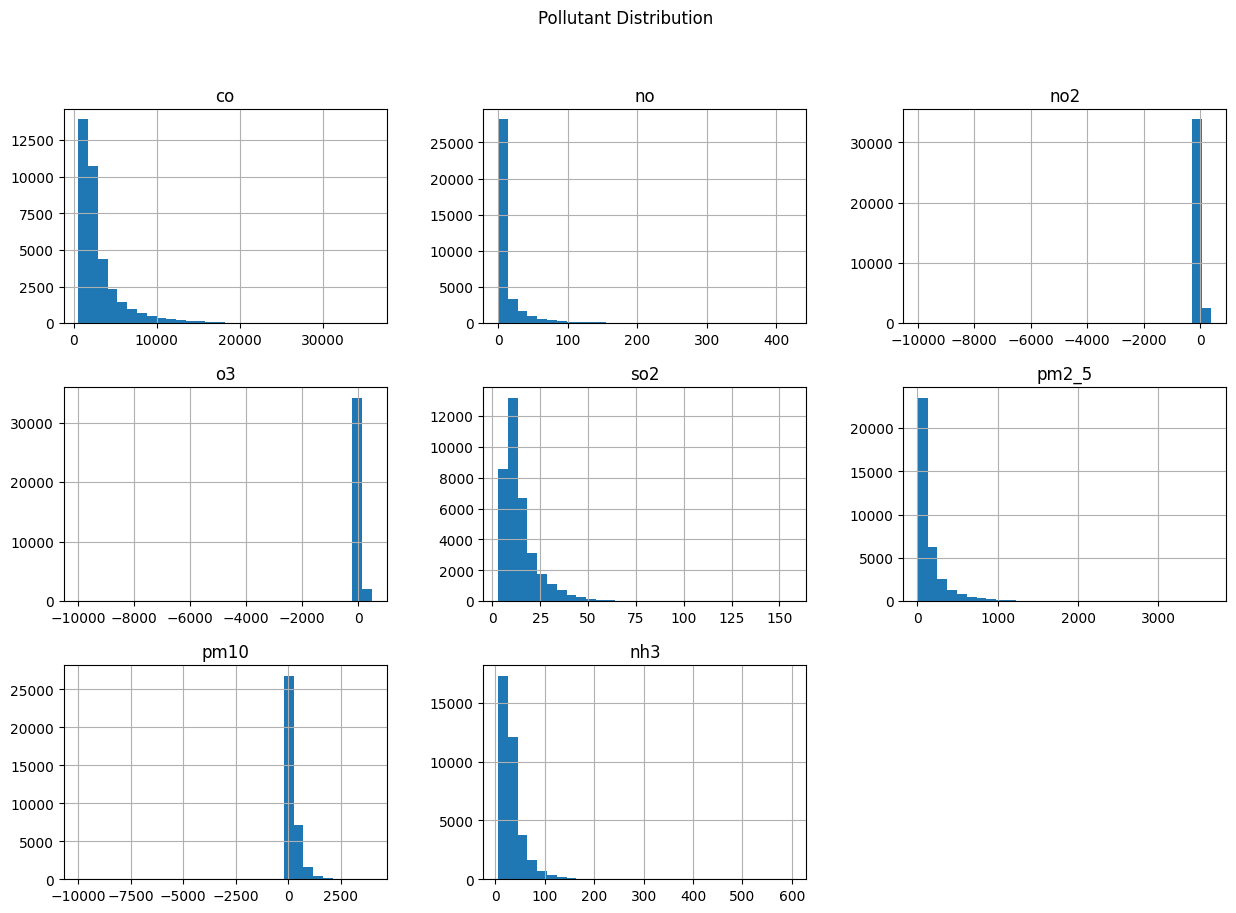

In [12]:
pollutants = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]

df[pollutants].hist(bins=30, figsize=(15, 10))

plt.suptitle('Pollutant Distribution')
plt.show()

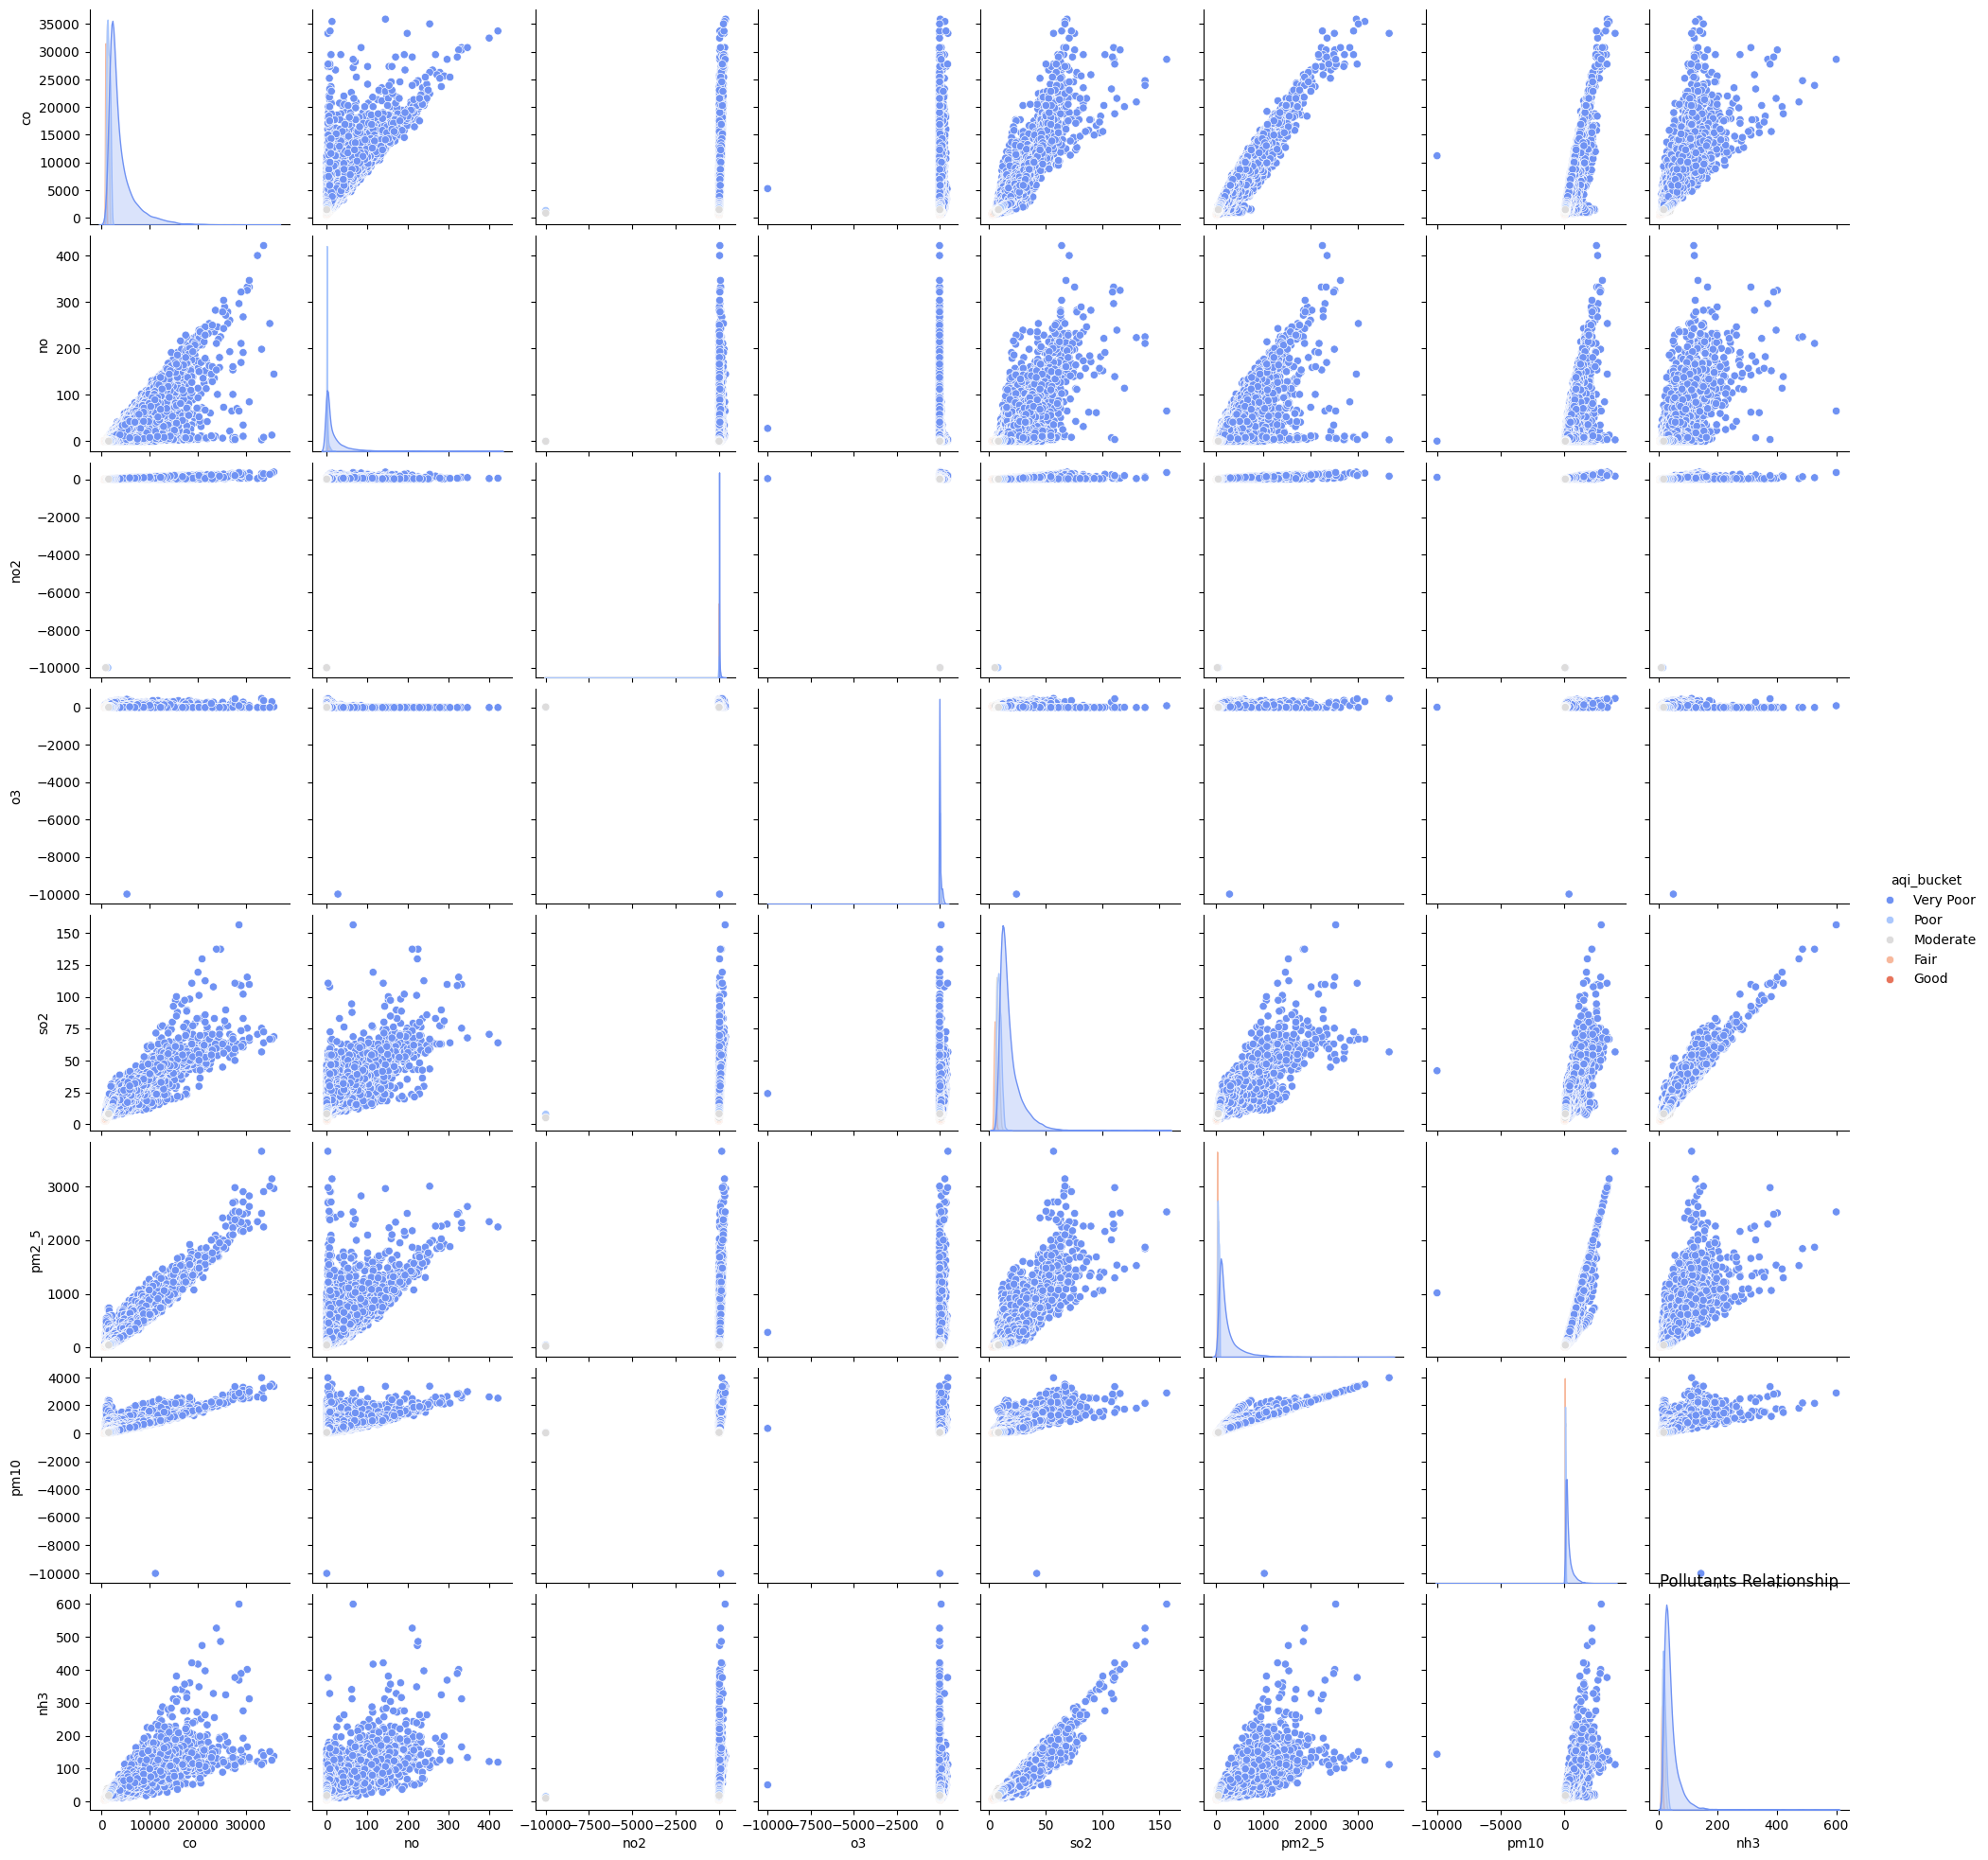

In [13]:
pollutants = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3", "aqi_bucket"]

sns.pairplot(data = df[pollutants], hue="aqi_bucket", kind="scatter", diag_kind="kde", palette="coolwarm")

plt.title("Pollutants Relationship")
plt.show()

**Key Observations**:
1. PM2.5, PM10, and Other Pollutants

    - Strong positive correlations exist between PM2.5, PM10, and other pollutant-related variables.
    - This suggests that an increase in PM2.5 levels is often accompanied by an increase in PM10 and possibly other particulate matter pollutants.

2. Outliers in Certain Features

    - Some scatter plots show extreme values, especially in PM2.5 and PM10, which could indicate pollution spikes during certain conditions.
    - Some variables have clusters along the zero-axis, possibly indicating missing or imbalanced data.

## Correlation Analysis
Understanding the correlation between different pollutants can help identify potential interactions and dependencies.

In [14]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.drop(columns=["row_id", "aqi"])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Air Quality Features')
plt.show()


KeyError: "['row_id'] not found in axis"

**Insights from the Correlation Heatmap:**
This heatmap visualizes the correlation coefficients between different air pollutant variables. Key takeaways:

1. Strong Positive Correlations:

    - CO (Carbon Monoxide) vs. SO₂ (Sulfur Dioxide) (0.93)
    → High levels of CO are associated with high levels of SO₂, suggesting common emission sources (e.g., combustion processes).
    - CO vs. PM2.5 (0.97) and PM10 (0.89)
    → Indicates that higher CO levels often coincide with higher particulate matter concentrations, likely due to vehicular emissions or industrial activities.
    - SO₂ vs. NH₃ (0.96)
    → Suggests that areas with high sulfur dioxide pollution also have high ammonia levels, possibly from industrial or agricultural emissions.
    - PM2.5 vs. PM10 (0.95)
    → Expected strong correlation, as both represent particulate matter pollution at different size levels.

2. Weak or Negative Correlations:

    - O₃ (Ozone) has weak correlations with most pollutants
    → Ozone levels appear independent of other pollutants, possibly due to complex photochemical reactions influenced by sunlight rather than direct emissions.
    - NO₂ (Nitrogen Dioxide) has lower correlations with other pollutants
    → NO₂ is only moderately correlated with CO (0.21) and PM2.5 (0.20), indicating that its sources or behavior may differ.

**Key Implications:**
- Common Pollution Sources:
    - The strong correlations between CO, SO₂, PM2.5, and PM10 suggest that these pollutants originate from similar sources, likely industrial emissions, vehicle exhaust, and combustion.
- Ozone's Unique Behavior:
    - The low correlation of O₃ with other pollutants suggests it is influenced by different atmospheric processes, like photochemical reactions rather than direct emissions.
- Air Quality Monitoring:
    - If PM2.5 and CO levels are high, it can be an early indicator of worsening air quality.
    - Areas with high NH₃ levels should also monitor SO₂ due to their strong correlation.

## Time Series Analysis

## Particulate matters (PM2.5 and PM10) Monthly and Annual Base

In [15]:
# extract month from date feature
df["month"] = pd.to_datetime(df["date"]).dt.month

# extract year from date feature
df["year"] = pd.to_datetime(df["date"]).dt.year

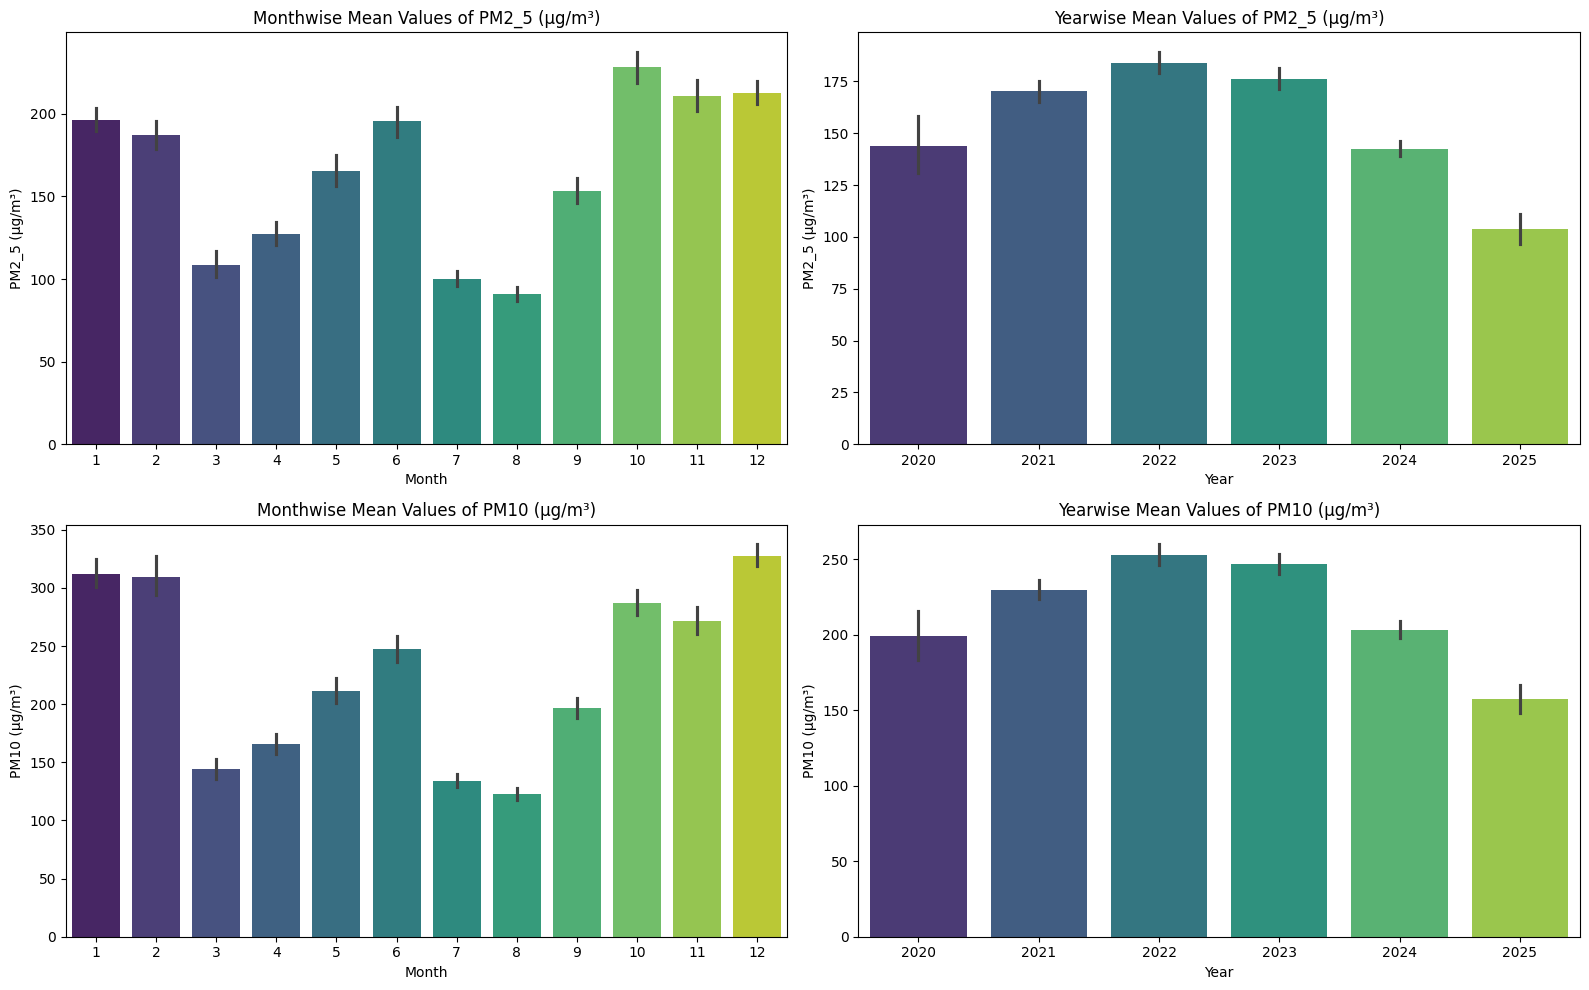

In [16]:
# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Monthwise Mean Values of PM2_5
sns.barplot(x=df['month'], y=df["pm2_5"], palette="viridis", ax=axes[0][0])
axes[0][0].set_title("Monthwise Mean Values of PM2_5 (µg/m³)")
axes[0][0].set_xlabel("Month")
axes[0][0].set_ylabel("PM2_5 (µg/m³)")

# Yearwise Mean Values of PM2_5
sns.barplot(x=df['year'], y=df["pm2_5"], palette="viridis", ax=axes[0][1])
axes[0][1].set_title("Yearwise Mean Values of PM2_5 (µg/m³)")
axes[0][1].set_xlabel("Year")
axes[0][1].set_ylabel("PM2_5 (µg/m³)")

# Monthwise Mean Values of PM10
sns.barplot(x=df['month'], y=df["pm10"], palette="viridis", ax=axes[1][0])
axes[1][0].set_title("Monthwise Mean Values of PM10 (µg/m³)")
axes[1][0].set_xlabel("Month")
axes[1][0].set_ylabel("PM10 (µg/m³)")

# Yearwise Mean Values of PM10
sns.barplot(x=df['year'], y=df["pm10"], palette="viridis", ax=axes[1][1])
axes[1][1].set_title("Yearwise Mean Values of PM10 (µg/m³)")
axes[1][1].set_xlabel("Year")
axes[1][1].set_ylabel("PM10 (µg/m³)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Particulate matters (CO and SO2) Monthly and Annual Base

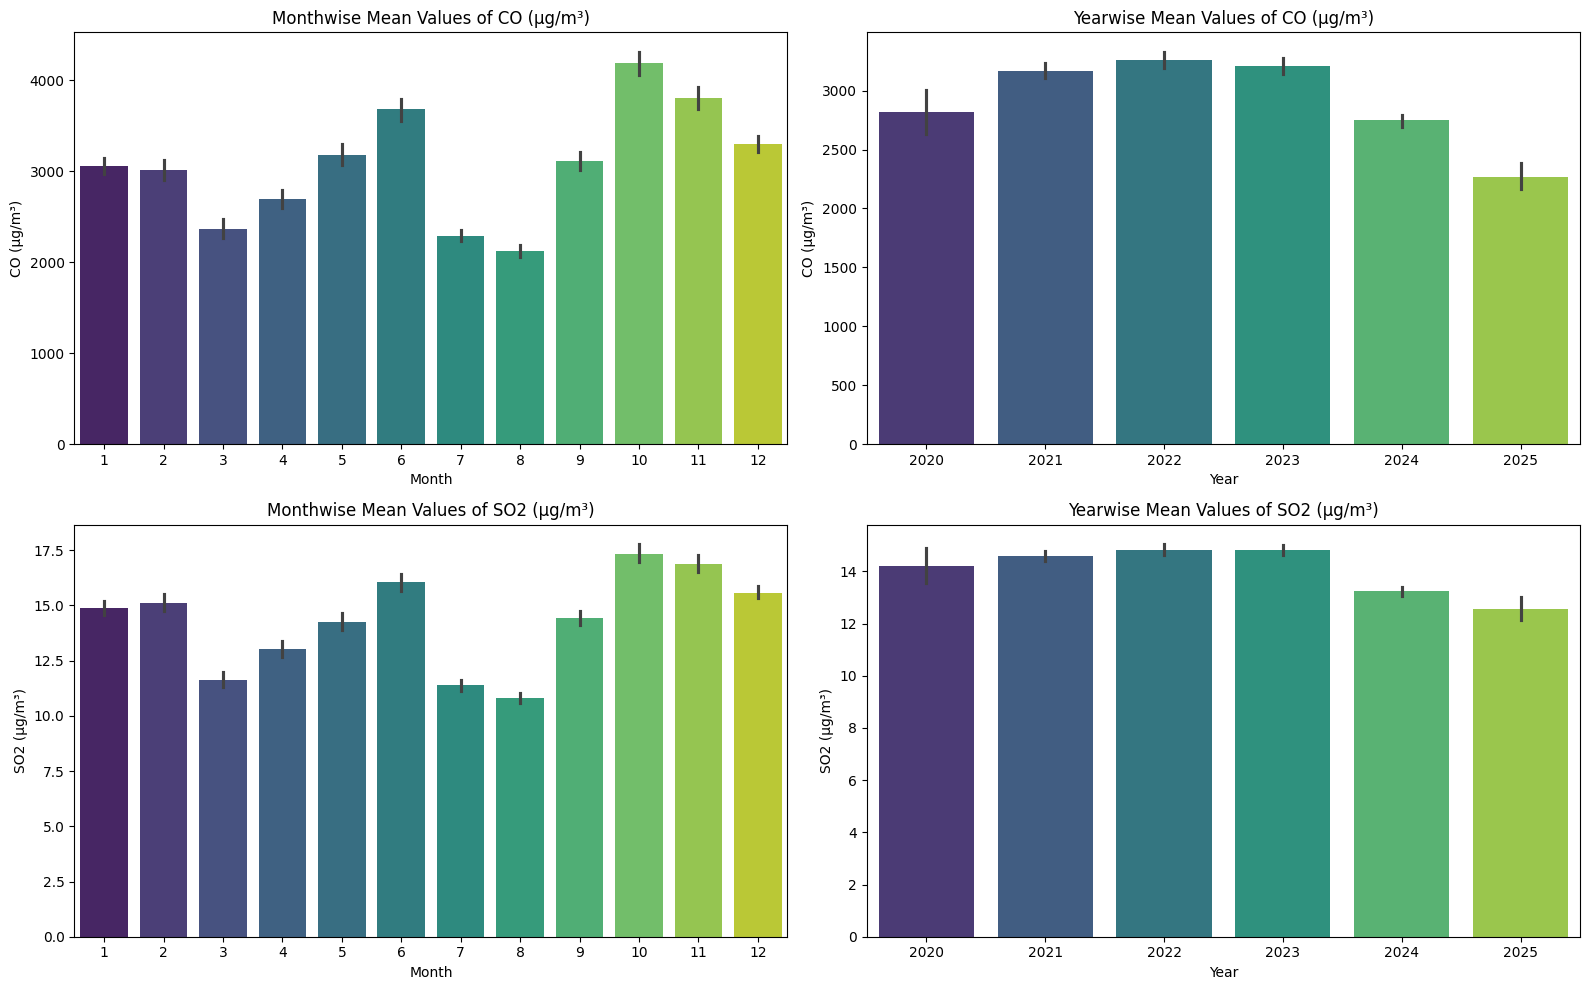

In [17]:
# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   

# Monthwise Mean Values of CO
sns.barplot(x=df['month'], y=df["co"], palette="viridis", ax=axes[0][0])
axes[0][0].set_title("Monthwise Mean Values of CO (µg/m³)")
axes[0][0].set_xlabel("Month")
axes[0][0].set_ylabel("CO (µg/m³)")

# Yearwise Mean Values of CO
sns.barplot(x=df['year'], y=df["co"], palette="viridis", ax=axes[0][1])
axes[0][1].set_title("Yearwise Mean Values of CO (µg/m³)")
axes[0][1].set_xlabel("Year")
axes[0][1].set_ylabel("CO (µg/m³)")

# Monthwise Mean Values of SO2
sns.barplot(x=df['month'], y=df["so2"], palette="viridis", ax=axes[1][0])
axes[1][0].set_title("Monthwise Mean Values of SO2 (µg/m³)")
axes[1][0].set_xlabel("Month")
axes[1][0].set_ylabel("SO2 (µg/m³)")

# Yearwise Mean Values of SO2
sns.barplot(x=df['year'], y=df["so2"], palette="viridis", ax=axes[1][1])
axes[1][1].set_title("Yearwise Mean Values of SO2 (µg/m³)")
axes[1][1].set_xlabel("Year")
axes[1][1].set_ylabel("SO2 (µg/m³)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Particulate matters (NO and NO2) Monthly and Annual Base

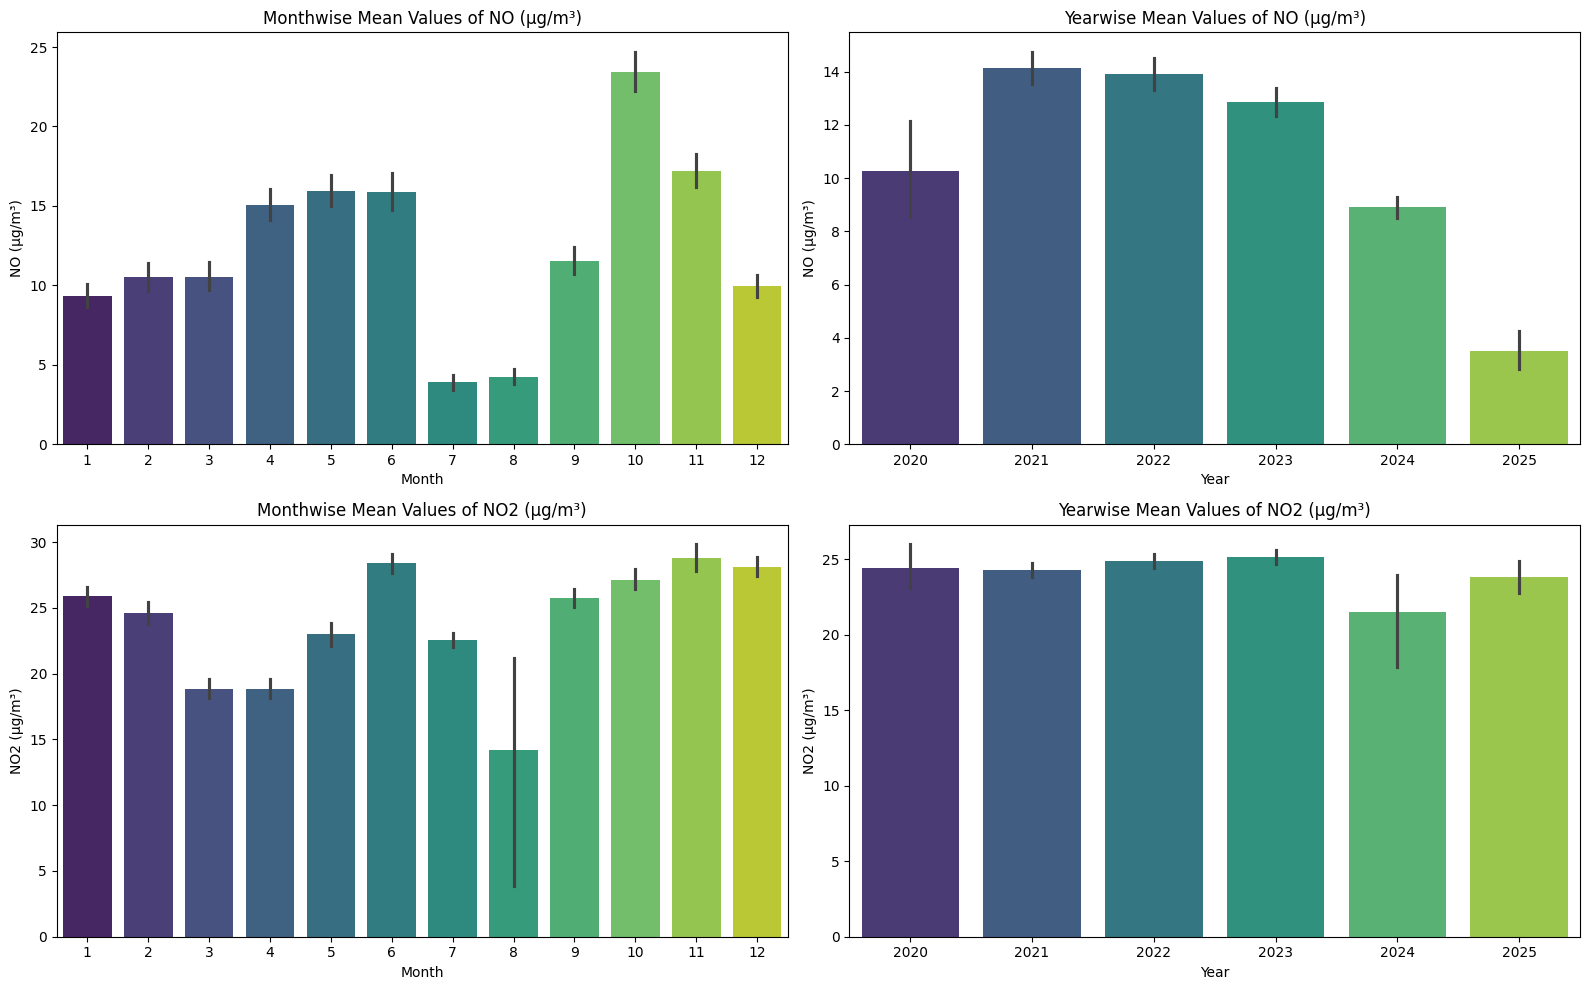

In [18]:
# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))   

# Monthwise Mean Values of NO
sns.barplot(x=df['month'], y=df["no"], palette="viridis", ax=axes[0][0])
axes[0][0].set_title("Monthwise Mean Values of NO (µg/m³)")
axes[0][0].set_xlabel("Month")
axes[0][0].set_ylabel("NO (µg/m³)")

# Yearwise Mean Values of NO
sns.barplot(x=df['year'], y=df["no"], palette="viridis", ax=axes[0][1])
axes[0][1].set_title("Yearwise Mean Values of NO (µg/m³)")
axes[0][1].set_xlabel("Year")
axes[0][1].set_ylabel("NO (µg/m³)")

# Monthwise Mean Values of NO2
sns.barplot(x=df['month'], y=df["no2"], palette="viridis", ax=axes[1][0])
axes[1][0].set_title("Monthwise Mean Values of NO2 (µg/m³)")
axes[1][0].set_xlabel("Month")
axes[1][0].set_ylabel("NO2 (µg/m³)")

# Yearwise Mean Values of N02
sns.barplot(x=df['year'], y=df["no2"], palette="viridis", ax=axes[1][1])
axes[1][1].set_title("Yearwise Mean Values of NO2 (µg/m³)")
axes[1][1].set_xlabel("Year")
axes[1][1].set_ylabel("NO2 (µg/m³)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Particulate matters (NH3 and 03) Monthly and Annual Base

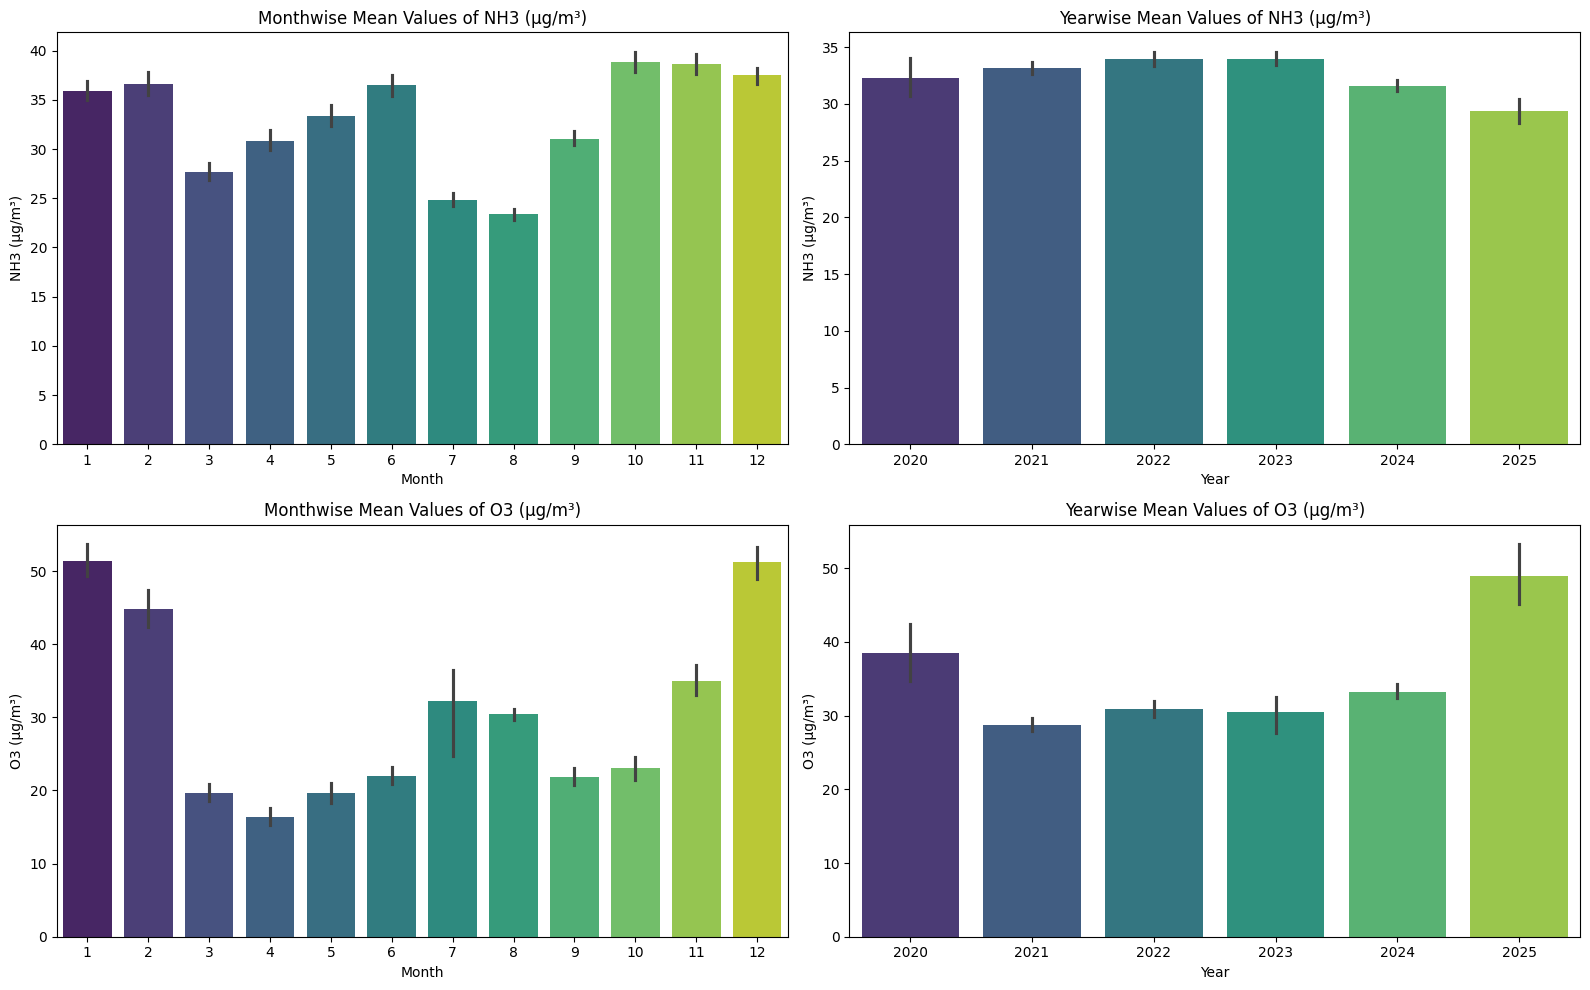

In [19]:
# Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Monthwise Mean Values of NH3
sns.barplot(x=df['month'], y=df["nh3"], palette="viridis", ax=axes[0][0])
axes[0][0].set_title("Monthwise Mean Values of NH3 (µg/m³)")
axes[0][0].set_xlabel("Month")
axes[0][0].set_ylabel("NH3 (µg/m³)")

# Yearwise Mean Values of NH3
sns.barplot(x=df['year'], y=df["nh3"], palette="viridis", ax=axes[0][1])
axes[0][1].set_title("Yearwise Mean Values of NH3 (µg/m³)")
axes[0][1].set_xlabel("Year")
axes[0][1].set_ylabel("NH3 (µg/m³)")

# Monthwise Mean Values of O3
sns.barplot(x=df['month'], y=df["o3"], palette="viridis", ax=axes[1][0])
axes[1][0].set_title("Monthwise Mean Values of O3 (µg/m³)")
axes[1][0].set_xlabel("Month")
axes[1][0].set_ylabel("O3 (µg/m³)")

# Yearwise Mean Values of O3
sns.barplot(x=df['year'], y=df["o3"], palette="viridis", ax=axes[1][1])
axes[1][1].set_title("Yearwise Mean Values of O3 (µg/m³)")
axes[1][1].set_xlabel("Year")
axes[1][1].set_ylabel("O3 (µg/m³)")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

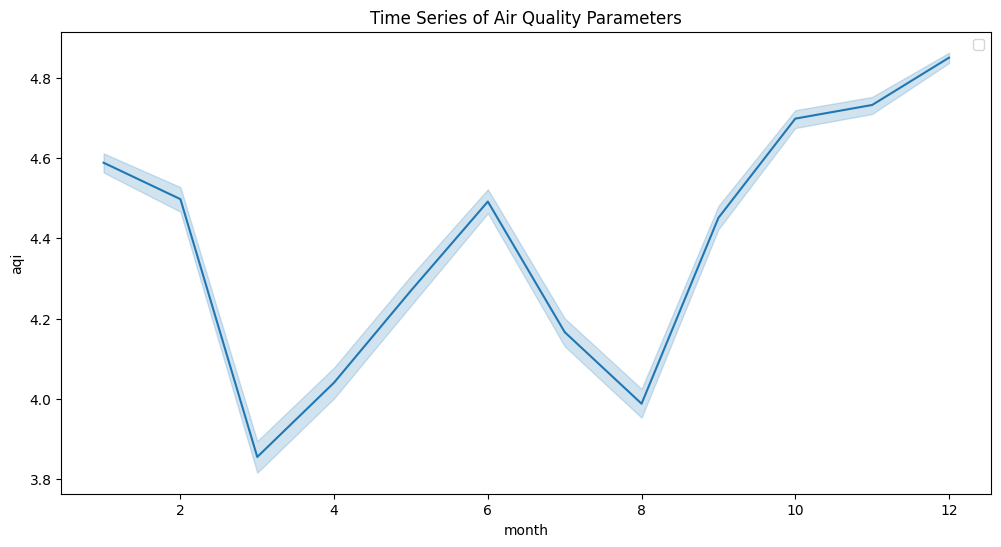

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df["month"], y=df["aqi"])
plt.title('Time Series of Air Quality Parameters')
plt.legend()
plt.show()

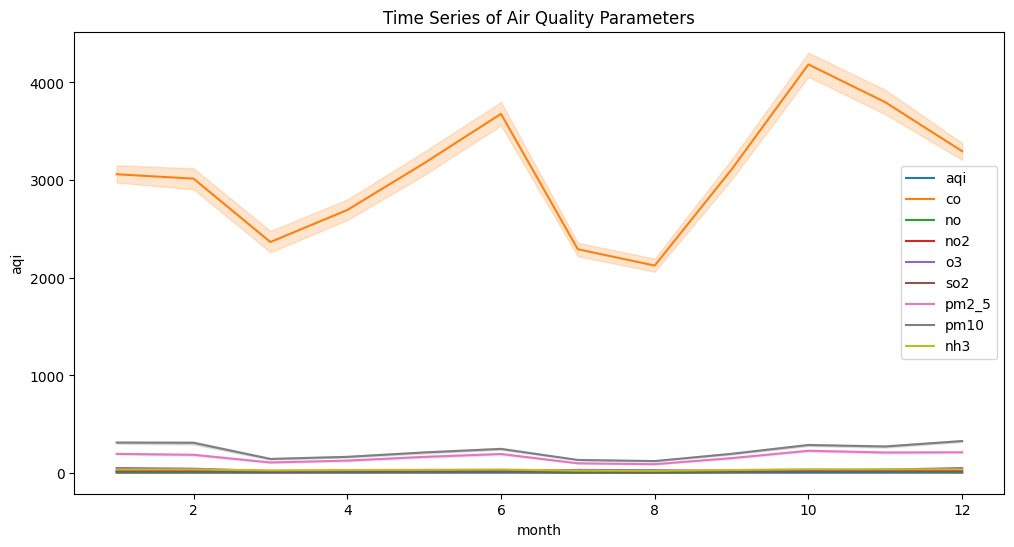

In [21]:
plt.figure(figsize=(12, 6))
for col in numeric_df:
    if col in df.columns:  # Ensure the column exists in the dataset
        sns.lineplot(data=df, x=df["month"], y=df[col], label=col)
    else:
        print(f"Warning: {col} is not in the DataFrame")
plt.title('Time Series of Air Quality Parameters')
plt.legend()
plt.show()

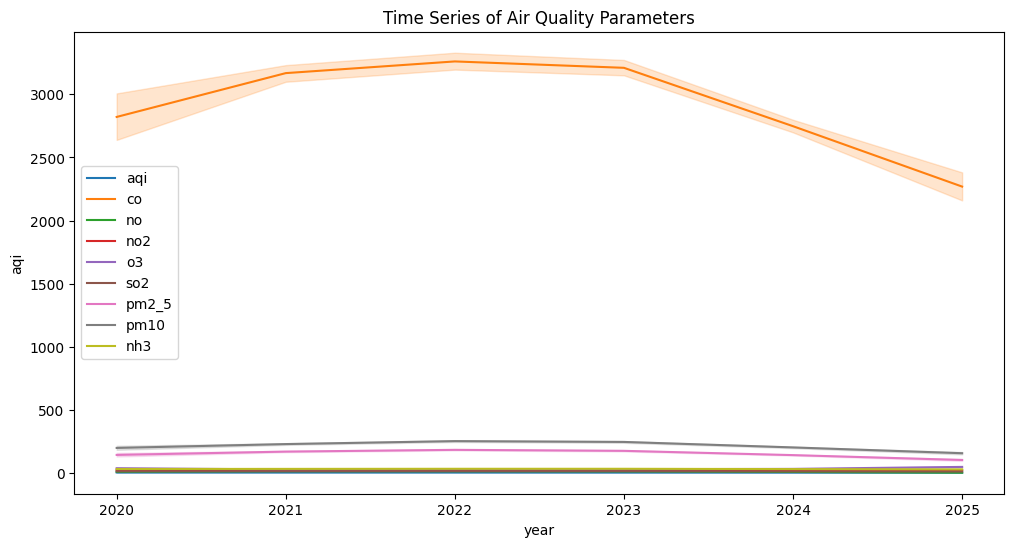

In [22]:
plt.figure(figsize=(12, 6))
for col in numeric_df:
    if col in df.columns:  # Ensure the column exists in the dataset
        sns.lineplot(data=df, x=df["year"], y=df[col], label=col)
    else:
        print(f"Warning: {col} is not in the DataFrame")
plt.title('Time Series of Air Quality Parameters')
plt.legend()
plt.show()